In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [3]:
import jieba as jb
import re

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

from tensorflow.keras.layers import Dense, Input, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Sequential


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [28]:
from sklearn.model_selection import GridSearchCV
import time


In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth",None)
pd.set_option('display.width',None)

In [8]:
import xgboost as xgb

In [39]:
# performance
performance_df = pd.DataFrame()
def sklearn_perform(model_name,performance,performance_df):
    perform_1 = pd.DataFrame(performance['1'],index = [model_name])
    perform_0 = pd.DataFrame(performance['0'],index = [model_name])
    perform_macro = pd.DataFrame(performance['macro avg'],index = [model_name])
    perform_weighted = pd.DataFrame(performance['weighted avg'],index = [model_name])
    performance_model = pd.DataFrame()
    performance_model.loc[model_name,'accuracy'] = performance['accuracy']    
    
    performance_model = pd.concat([performance_model,perform_1,perform_0,perform_macro,perform_weighted],axis = 1)    
    performance_df = pd.concat([performance_df,performance_model],axis = 0)
    return performance_df

In [101]:
newvalues_w2v = pd.read_csv('word2vec_gb_wx_0.95_withcontent.csv').drop('Unnamed: 0',axis = 1)

In [102]:
content_index_list = list(set(newvalues_w2v.content_index))

In [103]:
import random
# split 80% contents for training   11964.
random.seed(1)
train_content_idx = random.sample(content_index_list, int(len(content_index_list)*0.8))

In [104]:
test_content_idx = list(set(content_index_list) - set(train_content_idx))

In [105]:
train_dataset = newvalues_w2v[newvalues_w2v.content_index.isin(train_content_idx)]
test_dataset = newvalues_w2v[newvalues_w2v.content_index.isin(test_content_idx)]

In [106]:
train_X = train_dataset.iloc[:,6:]
test_X = test_dataset.iloc[:,6:]
train_y = train_dataset.label
test_y = test_dataset.label

In [107]:
def plot_roc(labels, predict_prob):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')

def generate_result_data(test, y_pred):
    test['prediction'] = y_pred
    test_result = test[['content','content_index','label','prediction']].groupby(['content','content_index']).agg(['sum'])
    test_result = test_result.reset_index()
    test_result.columns = ['content','content_index','actual_neg','predictive_neg']
    return test_result

In [108]:

train_xgb = train_dataset.copy()
test_xgb = test_dataset.copy()
train_X_xgb = train_X.copy()
test_X_xgb = test_X.copy()
train_y_xgb = train_y.copy()
test_y_xgb = test_y.copy()


In [109]:
xgb_model = xgb.XGBClassifier(max_depth=5,
                                      learning_rate= 0.05, #0.0001到0.1之间 太小速度很慢
                                      verbosity=1, 
                                      objective='binary:logistic',
                                      subsample = 0.7,
                                      colsample_bytree = 0.7,
                                      scale_pos_weight = 43770/16572, #不平衡处理 根据word2vec_gb_wx.label.value_counts() 决定
                                      random_state=1,
                                      nthreads = -1 #这里没有用到n_estimator, 因为用early_stopping_rounds使得auc最优
                             )

In [110]:
train_X_xgb, val_X_xgb, train_y_xgb, val_y_xgb = train_test_split(train_X_xgb, train_y_xgb, test_size=0.1)

In [111]:
startTime = time.time()

xgb_model.fit(train_X_xgb, train_y_xgb, early_stopping_rounds=10, eval_metric="auc",
        eval_set=[(val_X_xgb, val_y_xgb)])

usedTime = time.time() - startTime
usedTime

[0]	validation_0-auc:0.868943
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.892828
[2]	validation_0-auc:0.902423
[3]	validation_0-auc:0.906729
[4]	validation_0-auc:0.91046
[5]	validation_0-auc:0.913597
[6]	validation_0-auc:0.916362
[7]	validation_0-auc:0.91773
[8]	validation_0-auc:0.919089
[9]	validation_0-auc:0.920568
[10]	validation_0-auc:0.921264
[11]	validation_0-auc:0.922181
[12]	validation_0-auc:0.924384
[13]	validation_0-auc:0.924498
[14]	validation_0-auc:0.925295
[15]	validation_0-auc:0.926445
[16]	validation_0-auc:0.926538
[17]	validation_0-auc:0.926547
[18]	validation_0-auc:0.926739
[19]	validation_0-auc:0.927241
[20]	validation_0-auc:0.927776
[21]	validation_0-auc:0.928459
[22]	validation_0-auc:0.928921
[23]	validation_0-auc:0.929176
[24]	validation_0-auc:0.929905
[25]	validation_0-auc:0.929966
[26]	validation_0-auc:0.93039
[27]	validation_0-auc:0.930797
[28]	validation_0-auc:0.93106
[29]	validation_0-auc:0.93168
[30]	validation_0-auc

69.76391291618347

In [112]:
y_pred_xgb = xgb_model.predict(test_X_xgb)

In [113]:
print(classification_report(test_y_xgb, y_pred_xgb,digits=4))

              precision    recall  f1-score   support

           0     0.9625    0.9426    0.9524     10486
           1     0.5805    0.6839    0.6280      1218

    accuracy                         0.9157     11704
   macro avg     0.7715    0.8132    0.7902     11704
weighted avg     0.9228    0.9157    0.9187     11704



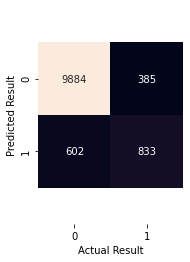

In [114]:
mat = confusion_matrix(y_pred_xgb,test_y_xgb)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [115]:
fbwx_w2v_xgb_performance = classification_report(test_y_xgb, 
                                                 y_pred_xgb,
                                                 digits=4,output_dict=True)
performance = fbwx_w2v_xgb_performance
model_name = 'fbwx_w2v_XGBoost'
performance_df = sklearn_perform(model_name,performance,performance_df)
performance_df

,accuracy,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support
fbwx_w2v_XGBoost,0.914303,0.573985,0.684729,0.624485,1218,0.962540,0.940969,0.951632,10486,0.768263,0.812849,0.788059,11704,0.922104,0.914303,0.917587,11704
fbwx_w2v_XGBoost,0.918917,0.887608,0.252874,0.393610,1218,0.919873,0.996281,0.956554,10486,0.903741,0.624577,0.675082,11704,0.916515,0.918917,0.897970,11704
fbwx_w2v_XGBoost,0.916183,0.583275,0.681445,0.628550,1218,0.962260,0.943448,0.952762,10486,0.772768,0.812447,0.790656,11704,0.922821,0.916183,0.919022,11704
fbwx_w2v_XGBoost,0.915670,0.580488,0.683908,0.627968,1218,0.962509,0.942590,0.952445,10486,0.771498,0.813249,0.790207,11704,0.922753,0.915670,0.918678,11704


In [154]:
test_result_xgb = generate_result_data(test_xgb,y_pred_xgb)

In [155]:
test_result_xgb[(test_result_xgb.actual_neg != 0) & 
               (test_result_xgb.predictive_neg == 0)].shape  # 有148篇实际负的预测为正

(149, 4)

In [156]:
test_result_xgb[(test_result_xgb.predictive_neg != 0)].shape   # 共返回497篇文章

(497, 4)

In [127]:
train_xgb_resampling = train_dataset.copy()
test_xgb_resampling = test_dataset.copy()
train_X_xgb_resampling = train_X.copy()
test_X_xgb_resampling = test_X.copy()
train_y_xgb_resampling = train_y.copy()
test_y_xgb_resampling = test_y.copy()

X_resampling = np.array(train_X_xgb_resampling)
y_resampling = train_y_xgb_resampling
ros = RandomOverSampler(random_state=0)
X_resampled_naive, y_resampled_naive = ros.fit_resample(X_resampling, y_resampling)

In [129]:
xgb_model = xgb.XGBClassifier(max_depth=5,
                                      learning_rate= 0.05, #0.0001到0.1之间 太小速度很慢
                                      verbosity=1, 
                                      objective='binary:logistic',
                                      subsample = 0.7,
                                      colsample_bytree = 0.7, 
                                      random_state=1,
                                      nthreads = -1 #这里没有用到n_estimator, 因为用early_stopping_rounds使得auc最优
                             )

In [130]:
train_X_xgb_resampling, val_X_xgb_resampling, train_y_xgb_resampling, val_y_xgb_resampling = train_test_split(X_resampled_naive, 
                                                                                                              y_resampled_naive, test_size=0.1)

In [133]:
startTime = time.time()

xgb_model.fit(train_X_xgb_resampling, train_y_xgb_resampling, early_stopping_rounds=10, eval_metric="auc",
        eval_set=[(val_X_xgb_resampling, val_y_xgb_resampling)])

usedTime = time.time() - startTime
usedTime

[0]	validation_0-auc:0.886017
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.905806
[2]	validation_0-auc:0.915614
[3]	validation_0-auc:0.918769
[4]	validation_0-auc:0.921832
[5]	validation_0-auc:0.924807
[6]	validation_0-auc:0.928618
[7]	validation_0-auc:0.929565
[8]	validation_0-auc:0.93053
[9]	validation_0-auc:0.932309
[10]	validation_0-auc:0.933128
[11]	validation_0-auc:0.93371
[12]	validation_0-auc:0.93435
[13]	validation_0-auc:0.935839
[14]	validation_0-auc:0.936477
[15]	validation_0-auc:0.937258
[16]	validation_0-auc:0.937936
[17]	validation_0-auc:0.938323
[18]	validation_0-auc:0.939058
[19]	validation_0-auc:0.939879
[20]	validation_0-auc:0.940327
[21]	validation_0-auc:0.940667
[22]	validation_0-auc:0.941178
[23]	validation_0-auc:0.9414
[24]	validation_0-auc:0.941844
[25]	validation_0-auc:0.942548
[26]	validation_0-auc:0.942782
[27]	validation_0-auc:0.943135
[28]	validation_0-auc:0.94411
[29]	validation_0-auc:0.94464
[30]	validation_0-auc:0

115.35608506202698

In [143]:
y_pred_xgb_resampling = xgb_model.predict(test_X_xgb_resampling.values)

In [144]:
print(classification_report(test_y_xgb_resampling, y_pred_xgb_resampling,digits=4))

              precision    recall  f1-score   support

           0     0.9814    0.8690    0.9218     10486
           1     0.4320    0.8580    0.5746      1218

    accuracy                         0.8678     11704
   macro avg     0.7067    0.8635    0.7482     11704
weighted avg     0.9242    0.8678    0.8856     11704



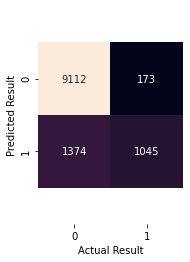

In [145]:
mat = confusion_matrix(y_pred_xgb_resampling,test_y_xgb_resampling)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [150]:
test_result_xgb = generate_result_data(test_xgb_resampling,y_pred_xgb_resampling)

In [152]:
test_result_xgb[(test_result_xgb.actual_neg != 0) & 
               (test_result_xgb.predictive_neg == 0)].shape  # 有60篇实际负的预测为正

(60, 4)

In [153]:
test_result_xgb[(test_result_xgb.predictive_neg != 0)].shape   # 共返回757篇文章

(757, 4)

In [81]:
paramGrid = {"max_depth" : [8,9,10]}
cv_times = 3

In [86]:
fit_params={"early_stopping_rounds":5, 
            "eval_metric" : 'auc', 
            "eval_set" : [[val_X_xgb, val_y_xgb]]}

In [87]:
xgb_model = xgb.XGBRegressor(learning_rate= 0.05, 
                             verbosity=0,
                             objective='binary:logistic',
                             subsample = 0.8,
                             colsample_bytree = 0.8,
                             scale_pos_weight = 43770/16572,
                             random_state=1,
                             nthreads = -1)

gridsearch = GridSearchCV(xgb_model, paramGrid, verbose=1,cv = cv_times,
                        n_jobs = -1)

gridsearch.fit(train_X_xgb, train_y_xgb, **fit_params)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  1.9min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.9min finished


[0]	validation_0-logloss:0.659568
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.627912
[2]	validation_0-logloss:0.600301
[3]	validation_0-logloss:0.573926
[4]	validation_0-logloss:0.549139
[5]	validation_0-logloss:0.52651
[6]	validation_0-logloss:0.505765
[7]	validation_0-logloss:0.486284
[8]	validation_0-logloss:0.467674
[9]	validation_0-logloss:0.450605
[10]	validation_0-logloss:0.435083
[11]	validation_0-logloss:0.419815
[12]	validation_0-logloss:0.406147
[13]	validation_0-logloss:0.393491
[14]	validation_0-logloss:0.381565
[15]	validation_0-logloss:0.370211
[16]	validation_0-logloss:0.359332
[17]	validation_0-logloss:0.349467
[18]	validation_0-logloss:0.339885
[19]	validation_0-logloss:0.330913
[20]	validation_0-logloss:0.322336
[21]	validation_0-logloss:0.314567
[22]	validation_0-logloss:0.307152
[23]	validation_0-logloss:0.300415
[24]	validation_0-logloss:0.293942
[25]	validation_0-logloss:0.287739
[26]	validation_0-logloss:0.281579

GridSearchCV(cv=3,
             estimator=XGBRegressor(colsample_bytree=0.7, learning_rate=0.05,
                                    nthreads=-1, objective='binary:logistic',
                                    random_state=1,
                                    scale_pos_weight=2.6412020275162926,
                                    subsample=0.7, verbosity=0),
             n_jobs=-1, param_grid={'max_depth': [8, 9, 10]}, verbose=1)

In [88]:
print(gridsearch.best_score_)
print(gridsearch.best_params_)

0.491522036468328
{'max_depth': 10}


In [89]:
gridsearch_test = xgb.XGBRegressor(learning_rate= 0.05, 
                         verbosity=1,
                         objective='binary:logistic',
                         subsample = 0.7,
                         colsample_bytree = 0.7,
                         scale_pos_weight = 43770/16572,
                         random_state=1,
                        max_depth = 10)
gridsearch_test.fit(train_X_xgb, train_y_xgb, early_stopping_rounds=5, eval_metric="auc",
        eval_set=[(val_X_xgb, val_y_xgb)])
y_pred_xgb_test = gridsearch_test.predict(test_X_xgb)

[0]	validation_0-auc:0.866246
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.897873
[2]	validation_0-auc:0.907112
[3]	validation_0-auc:0.916266
[4]	validation_0-auc:0.920136
[5]	validation_0-auc:0.925894
[6]	validation_0-auc:0.928139
[7]	validation_0-auc:0.929567
[8]	validation_0-auc:0.93136
[9]	validation_0-auc:0.93253
[10]	validation_0-auc:0.933752
[11]	validation_0-auc:0.935397
[12]	validation_0-auc:0.936204
[13]	validation_0-auc:0.936111
[14]	validation_0-auc:0.936116
[15]	validation_0-auc:0.936942
[16]	validation_0-auc:0.939575
[17]	validation_0-auc:0.939392
[18]	validation_0-auc:0.940461
[19]	validation_0-auc:0.940586
[20]	validation_0-auc:0.940798
[21]	validation_0-auc:0.94124
[22]	validation_0-auc:0.940914
[23]	validation_0-auc:0.940903
[24]	validation_0-auc:0.941545
[25]	validation_0-auc:0.94174
[26]	validation_0-auc:0.942237
[27]	validation_0-auc:0.942717
[28]	validation_0-auc:0.943222
[29]	validation_0-auc:0.943514
[30]	validation_0-auc

In [90]:
y_pred_xgb_test

array([0.09797329, 0.09006947, 0.0724839 , ..., 0.19242084, 0.42110378,
       0.12949386], dtype=float32)

In [71]:
y_pred_xgb_label_test = []
for i in y_pred_xgb_test:
    if i >= 0.5:
        label = 1
        y_pred_xgb_label_test.append(label)
    else:
        label = 0
        y_pred_xgb_label_test.append(label)

In [72]:
print(classification_report(test_y_xgb, y_pred_xgb_label_test,digits=4))

              precision    recall  f1-score   support

           0     0.9570    0.9591    0.9580     10486
           1     0.6410    0.6289    0.6349      1218

    accuracy                         0.9247     11704
   macro avg     0.7990    0.7940    0.7965     11704
weighted avg     0.9241    0.9247    0.9244     11704



In [ ]:
test_result_xgb = generate_result_data(test_xgb,y_pred_xgb)